In [1]:
import pyam
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.transforms as mtransforms

from pathlib import Path

<IPython.core.display.Javascript object>

Step 1: Read in both dataframes prepared in notebook 105*

In [2]:
df_bio = pd.read_csv(
    Path(
        '../data/105_bio_categories.csv'
    ),
    index_col=[0,1]
)

In [3]:
df_land = pd.read_csv(
    Path(
        '../data/105_land_categories.csv'
    ),
    index_col=[0,1]
)

Step 2: Keep only the R5 estimates.

In [4]:
df_bio = df_bio[df_bio['region']!="World"]
df_land = df_land[df_land['region']!="World"]

Step 3: Make the plot using the bio filters.

In [5]:
region_labels = {
    'R5ASIA':'Asia',
    'R5REF':'Reforming\nEconomies',
    'R5OECD90+EU':'OECD\nand EU',
    'R5MAF':'Middle East\nand Africa',
    'R5LAM':'Latin America\nand Caribbean'
}

In [6]:
df_bio.loc[:,'region'] = df_bio['region'].map(region_labels)
df_land.loc[:,'region'] = df_land['region'].map(region_labels)

In [7]:
def make_plot(df, col='category_pe_bio_netzero'):
    fig, ax = plt.subplot_mosaic(
        """
        ab
        """,
        sharex=True,
        sharey=True,
        figsize=(14, 4)
    )
    # Step 3.1: Sort the category values
    df_plot = (
        df[
            df['timeframe']=='2020_netzero'
        ]
        .sort_values(by=col)
    )
    if col == 'category_pe_bio_netzero':
        title='Bioenergy demand [EJ/yr]'
    else:
        title='Land cover\nenergy crops [Mha/yr]'
    # Step 3.2: Go through each CDR type amd plot
    for cdr_type in ['novel_cdr', 'conventional_cdr']:
        plot = df_plot[
            df_plot['cdr_type']==cdr_type
        ]
        p = sns.boxplot(
            x='region',
            y='value',
            hue=col,
            data=plot,
            ax=ax['a'] if cdr_type == 'novel_cdr' else ax['b'],
            showfliers=False,
            width=0.6,
            palette=[
                '#4dbdab',
                '#7688ab',
                '#ee8172'
            ]
        )
        if cdr_type=='novel_cdr':
            counts = df_plot[
                (df_plot['region']=='Asia')
                &
                (df_plot['cdr_type']=='novel_cdr')
            ][col].value_counts()
            display(counts)
            h, l = p.get_legend_handles_labels()
            l_new = [' '.join([x, f'[{str(counts[x])}]']) for x in l]
            ax['a'].legend(h, l_new, title=title, framealpha=0)
            p.set_title('Novel carbon removal', loc='left', weight='bold')
        else:
            p.set_title('Conventional carbon removal on land', loc='left', weight='bold')
        p.set_xlabel('')
        p.xaxis.set_tick_params(rotation=0)
        p.set_ylabel('Cumulative carbon removal between\n2020 and global net zero CO$_2$ [GtCO$_2$]')

    ax['b'].yaxis.set_tick_params(labelbottom=True)
    # Handle grids and annotations for subplots
    for lab,a in ax.items():
        a.grid(alpha=0.2)
        trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
        a.text(0.0, 1.0, lab, transform=a.transAxes + trans,
                va='bottom', weight='bold')
        a.axhline(0, color='black', linewidth=0.5)
    ax['b'].get_legend().remove()
    return fig

100-200    245
0-100      101
200+        60
Name: category_pe_bio_netzero, dtype: int64

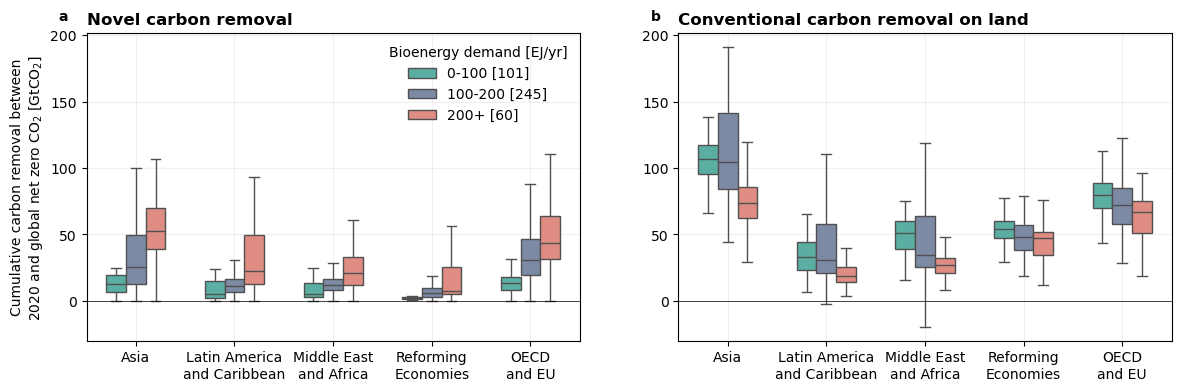

In [8]:
fig = make_plot(df_bio)

In [9]:
fig.savefig(
    Path(
        'figures/fig2_final.png'
    ),
    dpi=500,
    bbox_inches='tight'
)

100-400    281
400+        52
0-100       21
Name: category_land_cover_netzero, dtype: int64

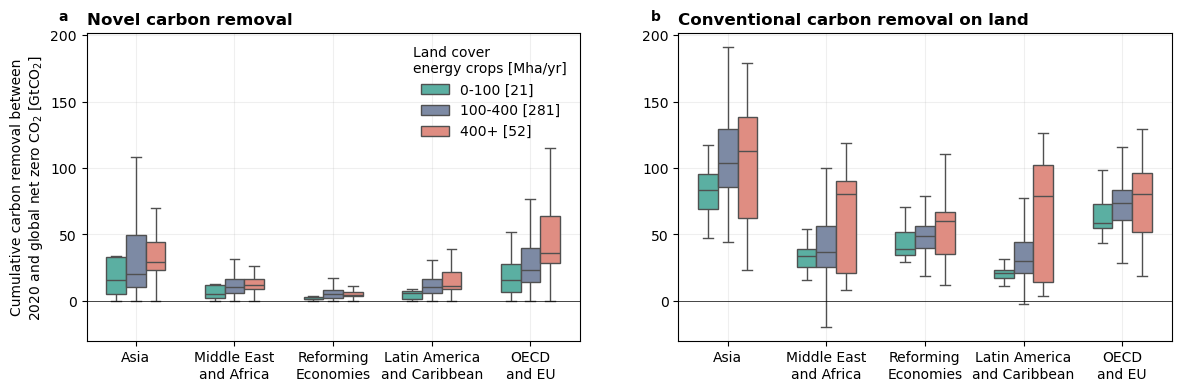

In [10]:
fig = make_plot(
    df_land,
    col='category_land_cover_netzero'
)

In [11]:
fig.savefig(
    Path(
        'figures/SI_fig2.png'
    ),
    dpi=500,
    bbox_inches='tight'
)